In [447]:
#Import Utilities
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import davies_bouldin_score,silhouette_score,homogeneity_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [449]:
# Read the CSV file named "clustering.csv" into a pandas DataFrame.
data = pd.read_csv("clustering.csv")

In [451]:
# Print the data types of each column in the DataFrame.
print(data.dtypes)

CustomerID          object
CustomerName        object
Region              object
SignupDate          object
TransactionID       object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [453]:
# Drop columns that are not relevant for the model.
data.drop(["CustomerName","TransactionID","SignupDate","TransactionDate"],axis=1,inplace=True)

In [455]:
# Create a LabelEncoder object
le = LabelEncoder()

In [457]:
# Apply label encoding for 'CustomerID'
data["CustomerID"] = le.fit_transform(data['CustomerID'])

In [459]:
# Apply label encoding for 'ProductID'
data["ProductID"] = le.fit_transform(data['ProductID'])

In [461]:
# Apply label encoding for 'Region'
data['Region'] = le.fit_transform(data['Region'])

In [463]:
# Split the data into training and testing sets.
# 
# * `test_size=0.4`: 40% of the data will be used for testing, 
#                   and 60% will be used for training.
# * `random_state=42`: Sets a seed for the random number generator, 
#                      ensuring reproducibility of the split
X_train,X_test = train_test_split(data,test_size=0.4,random_state=42)

In [465]:
# Perform K-means clustering on the training data.
kmeans = KMeans(n_clusters=7, max_iter=10000)
kmeans.fit(X_train)
labels = kmeans.predict(X_test)

C:\Users\NAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [467]:
# Deciding optimal number of clusters
sse,db={},{}
for k in range(6,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(data)
    labels= kmeans.predict(data)
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(data,labels)

C:\Users\NAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\NAVEEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

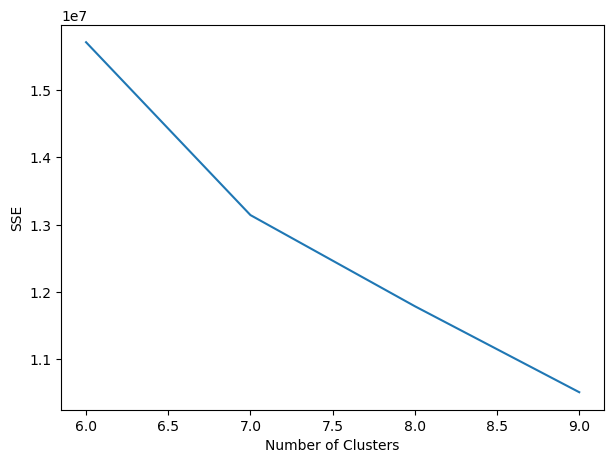

In [469]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

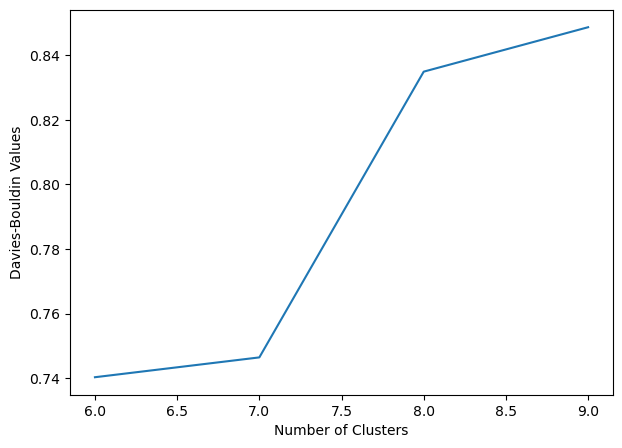

In [471]:
# Davis-Bouldin Index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()),list(db.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Values")
plt.show()

In [473]:
# Accuracy Metrics
score = silhouette_score(data,labels, metric="euclidean")
print("Silhouette Score: %3.f" %score)

Silhouette Score:   0


## Interpretation of a Silhouette Score of 0

A Silhouette Score of 0 in K-means clustering indicates that the data points are on or very close to the decision boundary between two clusters: This means that the data points are roughly equidistant from their assigned cluster and the nearest neighboring cluster.